In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bnqdflow as bf

from gpflow.kernels import SquaredExponential

from bnqdflow.analyses import SimpleAnalysis

sigma = 0.5  # Standard deviation
n = 100  # Number of data points

x = np.linspace(-3, 3, n)  # Evenly distributed x values

f = 0.8 * np.sin(x) + 0.2 * x ** 2 + 0.2 * np.cos(x / 4)  # Underlying function
y = np.random.normal(f, sigma, size=n)  # y values as the underlying function + noise

ip = 0.0  # single intervention point

# Data used by the control model (pre-intervention)
x1 = x[x <= ip]
y1 = y[x <= ip]

# Data used by the (post-)intervention model
x2 = x[x > ip]
y2 = y[x > ip]

In [2]:
a = SimpleAnalysis([(x1, y1), (x2, y2)], SquaredExponential(), ip)
a.train()

╒═══════════════════════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤══════════╕
│ name                                          │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │    value │
╞═══════════════════════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪══════════╡
│ ContinuousModel.models[0].kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 4.53142  │
├───────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ ContinuousModel.models[0].kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 2.56073  │
├───────────────────────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ ContinuousModel.models[0].likelihood.variance 

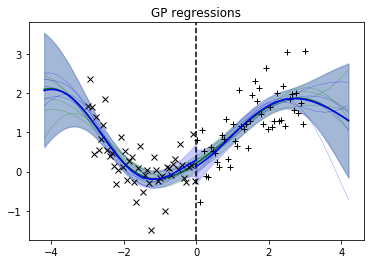

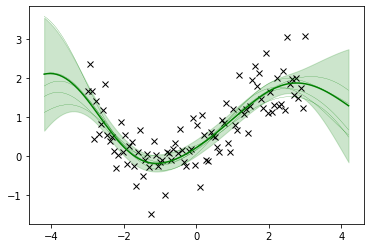

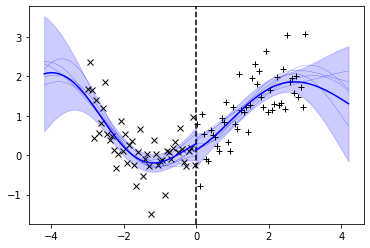

In [3]:
a.plot_regressions()
plt.show()

a.continuous_model.plot_regression()
plt.show()
a.discontinuous_model.plot_regression()



Bayes factor Md-Mc: -1.241769879167478
log marginal likelihoods:
	continuous model: -86.9395317970059
	discontinuous control model: -41.38858873172863
	discontinuous intervention model: -46.792712944444744


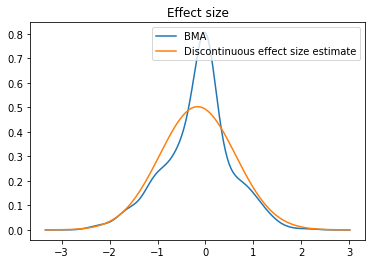

In [4]:
bayes_factor = a.log_bayes_factor(verbose=True)

e = a.get_effect_size(bf.effect_size_measures.Sharp())

plt.figure()
plt.title("Effect size")
x_range = e['es_range']
plt.plot(x_range, e['es_BMA'], label='BMA')
plt.plot(x_range, e['es_Disc'], label='Discontinuous effect size estimate')
plt.legend()
plt.show()

cm = a.continuous_model.model
dm = a.discontinuous_model
dcm = a.discontinuous_model.control_model
dim = a.discontinuous_model.intervention_model
print("log marginal likelihoods:\n\tcontinuous model: {}\n\tdiscontinuous control model: {}\n"
      "\tdiscontinuous intervention model: {}"
      .format(cm.maximum_log_likelihood_objective(), dcm.maximum_log_likelihood_objective(), dim.maximum_log_likelihood_objective()))
